In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import missingno as msno
import math
import pylab
import scipy.stats as stats


sns.palplot(sns.color_palette('deep'))
sns.set_style("whitegrid")
%matplotlib inline
%matplotlib inline
sns.set()

In [2]:
cols = [
    'id',
    'host_id',
    '',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

# '', '', '', '', 'neighbourhood_group',
#        'neighbourhood', 'latitude', 'longitude', '', '',
#        'minimum_nights', 'number_of_reviews', 'last_review',
#        'reviews_per_month', 'calculated_host_listings_count',
#        'availability_365'

data = pd.read_csv('data/listings_feb21.csv', low_memory=False, index_col='id')

In [3]:
data.head()

name  host_id  host_name  \
id                                                                            
2265   Zen-East in the Heart of Austin (monthly rental)     2466      Paddy   
5245  Eco friendly, Colorful, Clean, Cozy monthly share     2466      Paddy   
5456          Walk to 6th, Rainey St and Convention Ctr     8028     Sylvia   
5636         Soco, Barton Springs Private Guest Cottage     7148      Peggy   
5769                                     NW Austin Room     8186  Elizabeth   

      neighbourhood_group  neighbourhood  latitude  longitude  \
id                                                              
2265                  NaN          78702  30.27750  -97.71398   
5245                  NaN          78702  30.27577  -97.71379   
5456                  NaN          78702  30.26112  -97.73448   
5636                  NaN          78704  30.24630  -97.76361   
5769                  NaN          78729  30.45697  -97.78422   

            room_type  price  minimum_nights  number_of_reviews last_review  \
id                                                                            
2265  Entire home/apt    200               7                 24  2019-03-16   
5245     Private room    114              30                  9  2018-03-14   
5456  Entire home/apt    104               2                543  2021-02-01   
5636  Entire home/apt     46              30                 21  2020-11-06   
5769     Private room     39               1                259  2021-02-10   

      reviews_per_month  calculated_host_listings_count  availability_365  
id                                                                         
2265               0.17                               3               131  
5245               0.06                               3                 0  
5456               3.74                               1               354  
5636               0.15                               2                67  
5769               1.96                               1                79

In [4]:
# # determine the number of missing entries in each column
# for col in data.columns:
#     print('Number of Missing Values in '+ col +':', len(data[col][data[col].isnull()]))

In [5]:
# Now lets check the shape of the df and also see if there are any duplicates 
print(data.shape)
print("This dataset contains {} duplicate values.".format(data.duplicated().sum()))

(10272, 15)
This dataset contains 50 duplicate values.


In [6]:
# Specifying max_cols=df.shape[1] so we can look at all the columns in df.info()
data.info(max_cols=data.shape[1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272 entries, 2265 to 48111525
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            10272 non-null  object 
 1   host_id                         10272 non-null  int64  
 2   host_name                       10267 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   10272 non-null  int64  
 5   latitude                        10272 non-null  float64
 6   longitude                       10272 non-null  float64
 7   room_type                       10272 non-null  object 
 8   price                           10272 non-null  int64  
 9   minimum_nights                  10272 non-null  int64  
 10  number_of_reviews               10272 non-null  int64  
 11  last_review                     7672 non-null   object 
 12  reviews_per_month         

In [7]:
# Sorting null columns based on the number of null values in each column
print('Columns with Null values by their count:')
data.isnull().sum().sort_values(ascending=False)

Columns with Null values by their count:


neighbourhood_group               10272
reviews_per_month                  2600
last_review                        2600
host_name                             5
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
name                                  0
dtype: int64

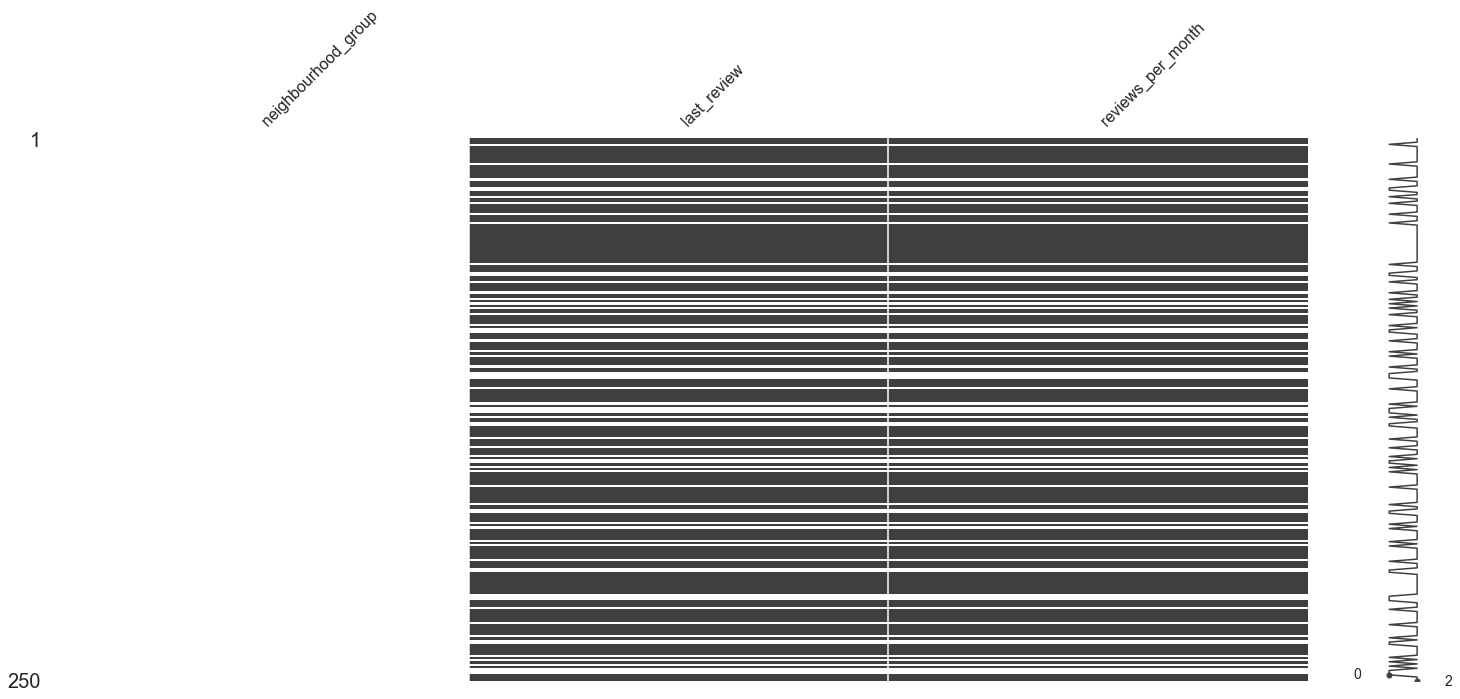

In [8]:
filtered_data = msno.nullity_filter(data, filter='bottom', n=25, p=0.999) # or filter='top'
msno.matrix(filtered_data.sample(250))

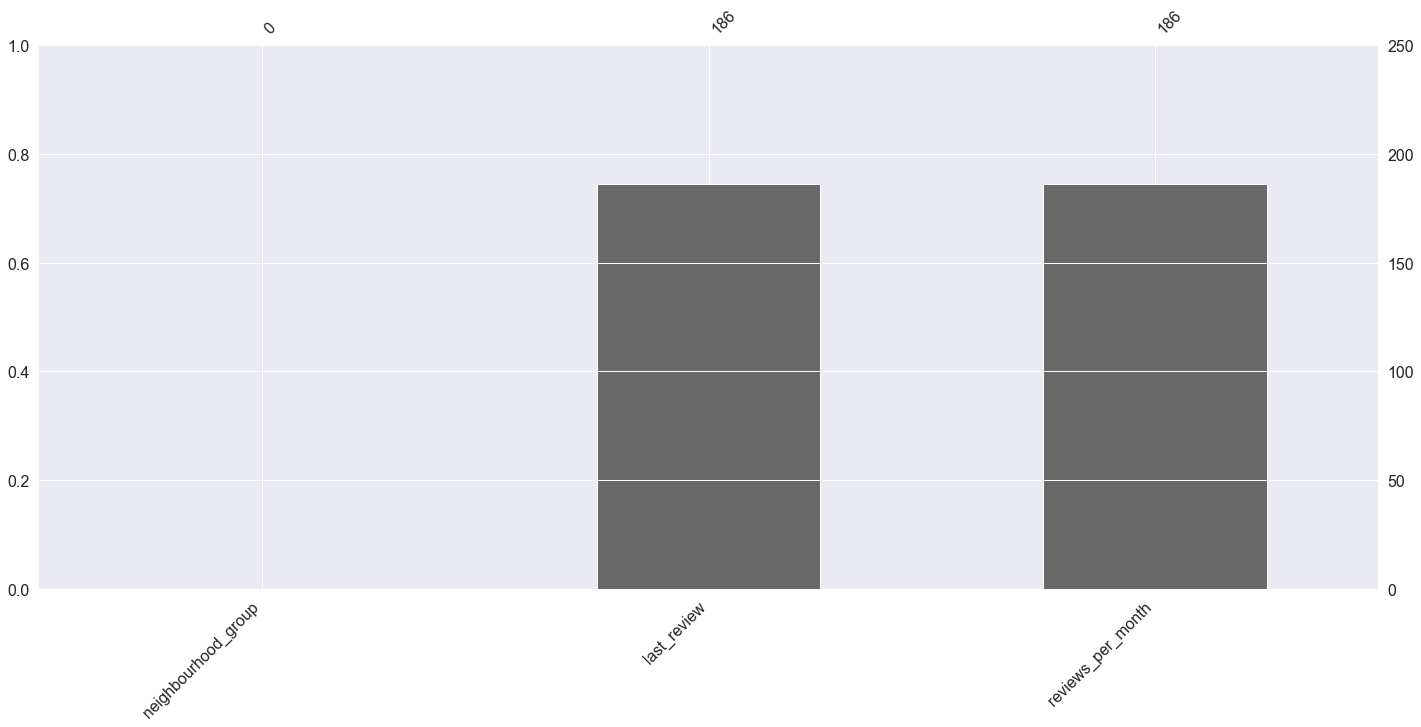

In [9]:
msno.bar(filtered_data.sample(250))

In [10]:
# Comparing 'price' with 'monthly_price' and 'weekly_price' to see which ones we need to keep
data['price'].head()

id
2265    200
5245    114
5456    104
5636     46
5769     39
Name: price, dtype: int64

In [11]:
# Looking at describe() to get some insights on 'price' and other numerical values
data.describe()

host_id  neighbourhood_group  neighbourhood      latitude  \
count  1.027200e+04                  0.0   10272.000000  10272.000000   
mean   9.482466e+07                  NaN   78723.162481     30.281591   
std    1.111380e+08                  NaN      20.827207      0.061041   
min    2.300000e+01                  NaN   78701.000000     30.078870   
25%    1.098138e+07                  NaN   78704.000000     30.245163   
50%    4.428986e+07                  NaN   78722.000000     30.270175   
75%    1.410198e+08                  NaN   78745.000000     30.305237   
max    3.879780e+08                  NaN   78759.000000     30.515280   

          longitude         price  minimum_nights  number_of_reviews  \
count  10272.000000  10272.000000    10272.000000       10272.000000   
mean     -97.752913    255.656542        8.240654          31.720600   
std        0.058415    513.284268       23.416609          68.107864   
min      -98.056630      0.000000        1.000000           0.000000   
25%      -97.770485     82.000000        1.000000           0.000000   
50%      -97.745035    136.000000        2.000000           5.000000   
75%      -97.721430    250.000000        3.000000          29.000000   
max      -97.560620  16264.000000      999.000000         951.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        7672.000000                    10272.000000      10272.000000  
mean            1.280021                       19.581192        122.290401  
std             1.697720                       67.081990        138.467978  
min             0.010000                        1.000000          0.000000  
25%             0.160000                        1.000000          0.000000  
50%             0.650000                        1.000000         59.000000  
75%             1.790000                        4.000000        263.250000  
max            34.030000                      358.000000        365.000000

In [12]:
# Looking at describe() to get some insights on 'price'
data['price'].describe()

count    10272.000000
mean       255.656542
std        513.284268
min          0.000000
25%         82.000000
50%        136.000000
75%        250.000000
max      16264.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Rental Price Boxplot')

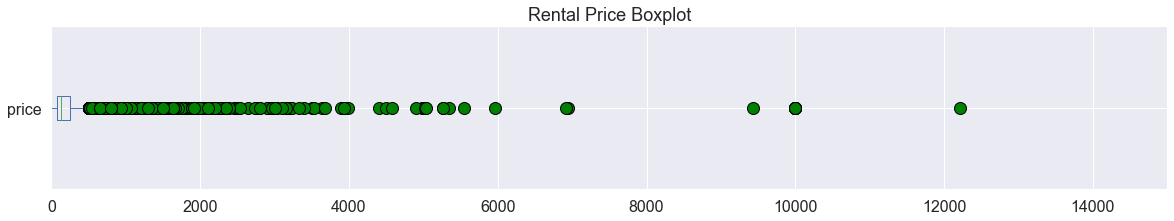

In [13]:
# Visualizing the 'price' column using boxplot and distplot
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
data['price'].plot(kind='box', xlim=(0, 15000), vert=False, figsize=(20,3), flierprops=flierprops, fontsize=16)
plt.title('Rental Price Boxplot', fontsize=18)

Text(0.5, 1.0, 'Price Density Plot')

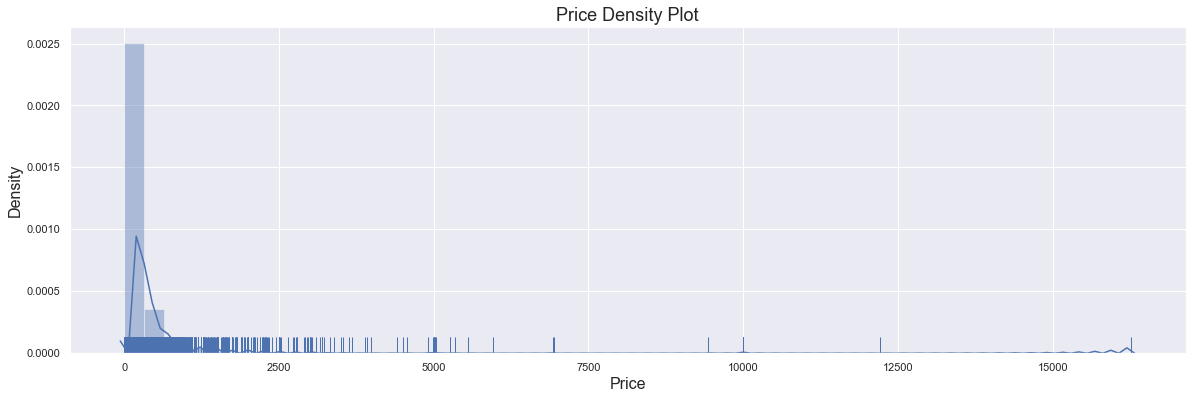

In [14]:
plt.figure(figsize=(20,6))
sns.distplot(data['price'], rug=True)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Price Density Plot', fontsize=18)

In [15]:
data['price'].isnull().sum()

0

In [16]:
data['price'].value_counts()

150     258
200     213
100     211
75      184
250     167
       ... 
1156      1
1148      1
3189      1
410       1
12        1
Name: price, Length: 849, dtype: int64

In [17]:
# Let's look at 'bedrooms', 'bathrooms', 'accommodates', 'zipcode' and 'listing_url' where the 'price' is 0
data[data['price'] < 20]

name    host_id  \
id                                                                       
685451                          Camping is EZ in SxSAustin1    1568741   
968817                                 CampEZ in SxSAustin8    1568741   
5736280                    Airstream Recording Studio Space   29654802   
10433894                Modern. Texas living. Amazing deal.   53742919   
12165731     Room in Quiet Apartment for 9-5 Employed Guest   51809476   
...                                                     ...        ...   
46768522         Cheap private bedroom and private bathroom  179873319   
46936029  Austin | Near Downtown & Airport | 10 Minute Zone  332138819   
47800632                                CampEZin SxSAustin2    1568741   
47930349           Literally just a couch in my living room  242611756   
47947560      Convenient AirBnb located in the heart of ATX  370062951   

          host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
id                                                                             
685451       Jim O'                  NaN          78745  30.20840  -97.76878   
968817       Jim O'                  NaN          78745  30.21003  -97.76940   
5736280        Will                  NaN          78748  30.15909  -97.81786   
10433894     Harold                  NaN          78741  30.22303  -97.72084   
12165731        Dao                  NaN          78723  30.29580  -97.68615   
...             ...                  ...            ...       ...        ...   
46768522  Chukwuyem                  NaN          78741  30.23898  -97.71578   
46936029   Danielle                  NaN          78723  30.30678  -97.66156   
47800632     Jim O'                  NaN          78745  30.20994  -97.77055   
47930349     Andrew                  NaN          78724  30.25932  -97.58896   
47947560   Jeremiah                  NaN          78705  30.29151  -97.74554   

                room_type  price  minimum_nights  number_of_reviews  \
id                                                                    
685451    Entire home/apt     15               2                 15   
968817    Entire home/apt     15               3                 14   
5736280      Private room     18              30                 18   
10433894     Private room     19               1                  0   
12165731      Shared room     19              30                  5   
...                   ...    ...             ...                ...   
46768522     Private room     17               1                  0   
46936029  Entire home/apt     18               2                  3   
47800632  Entire home/apt     15               2                  0   
47930349      Shared room     16               1                  0   
47947560      Shared room     16               2                  2   

         last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                        
685451    2020-09-14               0.16                               7   
968817    2021-01-21               0.15                               7   
5736280   2019-06-05               0.25                               1   
10433894         NaN                NaN                               1   
12165731  2016-08-17               0.09                               9   
...              ...                ...                             ...   
46768522         NaN                NaN                               1   
46936029  2021-02-01               1.55                               1   
47800632         NaN                NaN                               7   
47930349         NaN                NaN                               4   
47947560  2021-02-11               2.00                               2   

          availability_365  
id                          
685451                   1  
968817                 365  
5736280                319  
104338

In [18]:
data = data[data['price']>50]
#data[data['price']<50]

In [19]:
data['price'].describe()

count     9127.000000
mean       283.024214
std        538.315433
min         51.000000
25%         98.000000
50%        150.000000
75%        280.000000
max      16264.000000
Name: price, dtype: float64

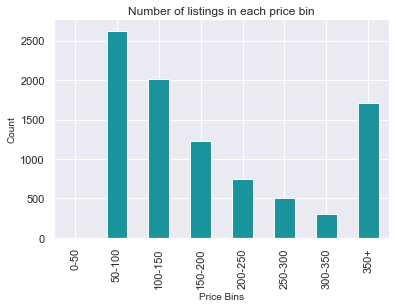

In [20]:
# Creating price bins column and using it for some visualization
price_bins = pd.cut(data['price'], 
                     bins=[0, 50, 100, 150, 200, 250, 300, 350, data['price'].max()], 
                     labels=["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350+"])
data['price_bins'] = price_bins 
data['price_bins'].value_counts().sort_index().plot(kind='bar', color='#1A939C')
plt.title('Number of listings in each price bin')
plt.xlabel('Price Bins', fontsize=10)
plt.ylabel('Count', fontsize=10)
sns.despine(top=True, right=True)
plt.show()

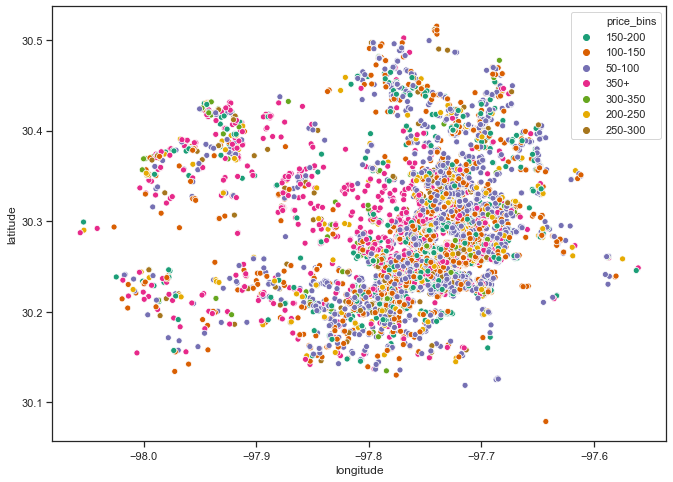

In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=data, x='longitude', y='latitude', hue='price_bins', palette='Dark2', ax=ax);

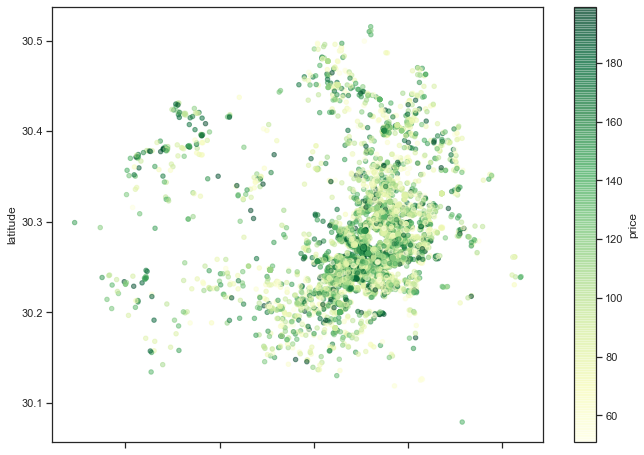

In [22]:
# Using 'longitude' and 'latitude' to plot and look at the areas where the 'price' is below 200
data[data['price']<200].plot.scatter(x='longitude', y='latitude', c='price', figsize=(11,8), cmap='YlGn', alpha=0.5);

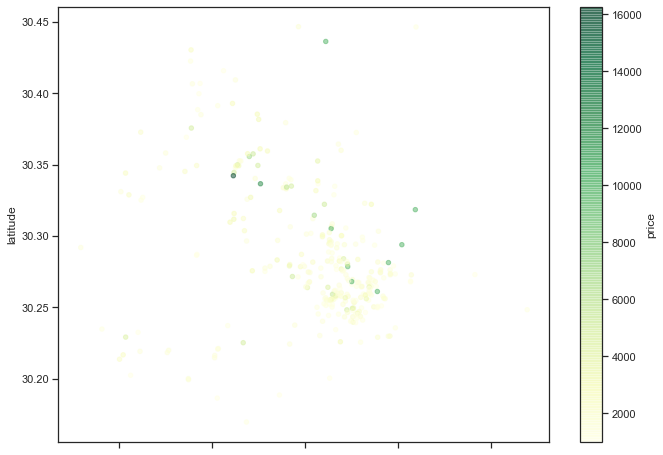

In [23]:
# Using 'longitude' and 'latitude' to plot and look at the areas where the 'price' is above 1000
data[data['price']>1000].plot.scatter(x='longitude', y='latitude', c='price', figsize=(11,8), cmap='YlGn', alpha=0.5);

In [24]:
# Plotly helps us see every single datapoint and hovering over each would give us info about price and property_type
import plotly.express as px
fig = px.scatter(data, x="longitude", y="latitude", color='price', hover_data=['room_type'])
fig.show()

In [25]:
# Let's replace $10,000 with NaNs, and the fill the NaNs with the median price based on each property_type

In [26]:
#data = data[data['price']<4000]

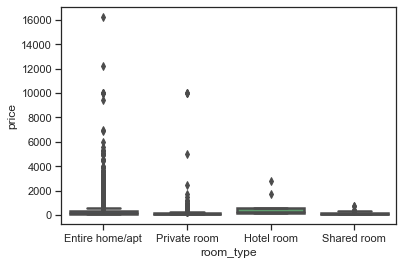

In [27]:
sns.boxplot(x='room_type', y='price', data=data, linewidth=2.5)

In [28]:
data.groupby('room_type')['price'].median()

room_type
Entire home/apt    166
Hotel room         220
Private room        89
Shared room        100
Name: price, dtype: int64

In [29]:
# We still have some outliers above $8,000. Let's define a mask and then repalce mask with NaNs and later fill NaNs with
# the median price based on each property_type
mask = data[data['price']>=700]['price']

In [30]:
data['price'].replace(mask, np.nan, inplace=True)
data['price'].fillna(data.groupby(['room_type'])['price'].transform('median'), inplace=True)

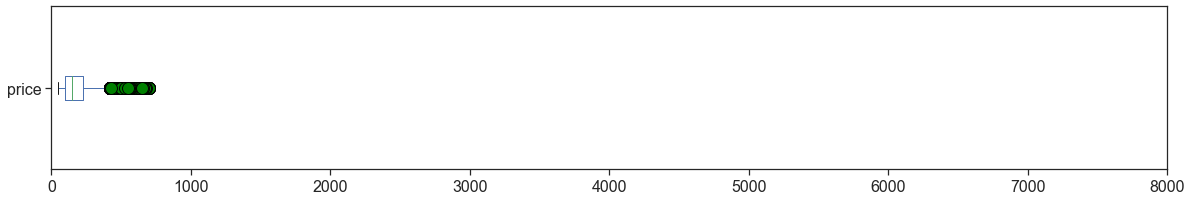

In [31]:
# Visualizing the 'price' column using boxplot
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
data['price'].plot(kind='box', xlim=(0, 8000), vert=False, figsize=(20,3), flierprops=flierprops, fontsize=16)

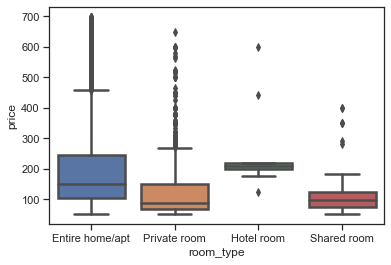

In [32]:
sns.boxplot(x='room_type', y='price', data=data, linewidth=2.5)

In [35]:
data.groupby('room_type')['price'].describe()

count        mean         std    min    25%    50%    75%  \
room_type                                                                     
Entire home/apt  7795.0  198.140731  133.125974   51.0  105.0  150.0  246.0   
Hotel room          9.0  265.777778  152.585859  125.0  200.0  210.0  220.0   
Private room     1281.0  123.355191   92.836859   51.0   68.0   89.0  149.0   
Shared room        42.0  135.952381  101.144114   51.0   75.0   99.5  125.0   

                   max  
room_type               
Entire home/apt  699.0  
Hotel room       599.0  
Private room     650.0  
Shared room      400.0

Entire home/apt    0.854059
Private room       0.140353
Shared room        0.004602
Hotel room         0.000986
Name: room_type, dtype: float64


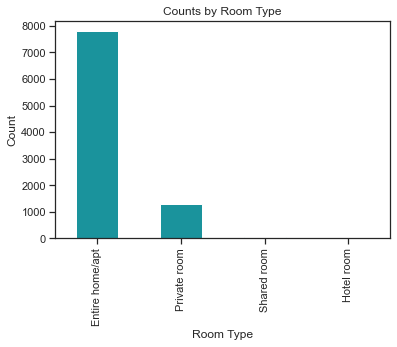

In [36]:
# Let's look at the room_type distribution
print(data['room_type'].value_counts(normalize=True))
data['room_type'].value_counts().plot(kind='bar', color='#1A939C')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.title('Counts by Room Type');

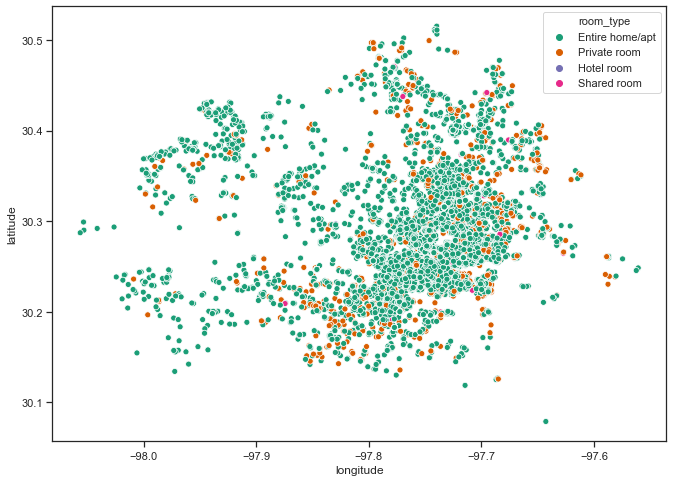

In [37]:
# Plotting room_type shows that Entire home/apt has the most datapoints. 
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=data, x='longitude', y='latitude', hue='room_type', palette='Dark2', ax=ax);

In [39]:
data.last_review.isnull().sum()

2405